In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm

X, y = datasets.make_classification(n_samples=100_000)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)
clf = svm.SVC()
clf.fit(X_train, y_train)


def get_roc_plot(clf, X_test, y_test):
    metrics.plot_roc_curve(clf, X_test, y_test)

    plt.title("ROC curve")
    plt.xlabel("FP rate")
    plt.ylabel("TP rate")
    plt.savefig(f"model_roc_curve.jpeg", dpi=200)


get_roc_plot(clf, X_test, y_test)

In [37]:
from sklearn.metrics import PrecisionRecallDisplay

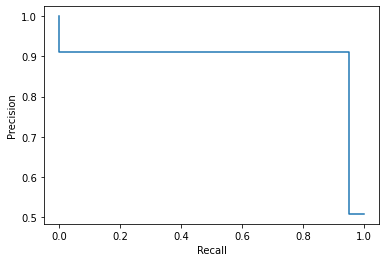

In [38]:
def plot_precision_recall(
    ax, y, y_pred_proba, legend_loc="best", label=None, *args, **kwargs
):
    auc = average_precision_score(y, y_pred_proba)
    precision, recall, threshold = precision_recall_curve(y, y_pred_proba)

    ax.set_title("Precision-Recall Curve")
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])

    if label is None:
        plot_label = "area = {:0.2f}".format(auc)
    else:
        plot_label = "{}: area = {:0.2f}".format(label, auc)

    ax.plot(recall, precision, label=plot_label, *args, **kwargs)
    ax.legend(loc=legend_loc)
    return ax